In [2]:
from yuning_util.dev_mode import DevMode
dev_mode = DevMode('k-seq')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
from k_seq.data import simu
from k_seq.model import kinetic, pool
from k_seq.utility import plot_tools
reload(kinetic)
reload(pool)
reload(simu)
reload(plot_tools)

plt.style.use('seaborn')

# Quick view of actual dataset
To simulate more realistic dataset, we overview the distribution of current real dataset, typically:

- relative abundance distribution in the input pool
- distribution of kinetic coefficients: k, A 

In [15]:
def compose_results(seq_table, estimation_res):
    from k_seq.utility.file_tools import read_pickle
    import pandas as pd
    
    seq_table = read_pickle(seq_table)
    results = pd.read_csv(estimation_res, index_col=0)
    results = results[~np.any(results.isna(), axis=1)]
    seqs = results.index.values
    input_counts = seq_table.table.reindex(seqs)['R0'].sparse.to_dense()
    results['p0'] = input_counts / input_counts.sum()
    return results

byo_doped = compose_results(
    seq_table='/mnt/storage/projects/k-seq/datasets/byo-doped.pkl',
    estimation_res='/mnt/storage/projects/k-seq/working/byo_doped/least_square/pandaSeq/point-est_2019-12/table-spike-in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-7/fit_summary.csv'
)
byo_selected = compose_results(
    seq_table='/mnt/storage/projects/k-seq/datasets/byo-selected.pkl',
    estimation_res='/mnt/storage/projects/k-seq/working/byo_doped/'
)

In [16]:
byo_doped.isna()

,k,A,kA,p0
CTGGTCTTCAAGCAATCGGTC,False,False,False,False
CTAGGTTTCAAGCAATCGGTC,False,False,False,False
CCTCGTTTCAAACAATCGGTC,False,False,False,False
CTAAGTTTCAAGCAATCGGTC,False,False,False,False
GCTGACTTCAAACAATCGGTC,False,False,False,False
...,...,...,...,...
AAGTTTCCTAATAGATGCAAG,False,False,False,False
AAGTTTACTAATATTCGTAAG,False,False,False,False
AAGTTTGCTAACGGTCGCAAC,False,False,False,False
AAGATTGCTAATAGGGGCAAG,False,False,False,False


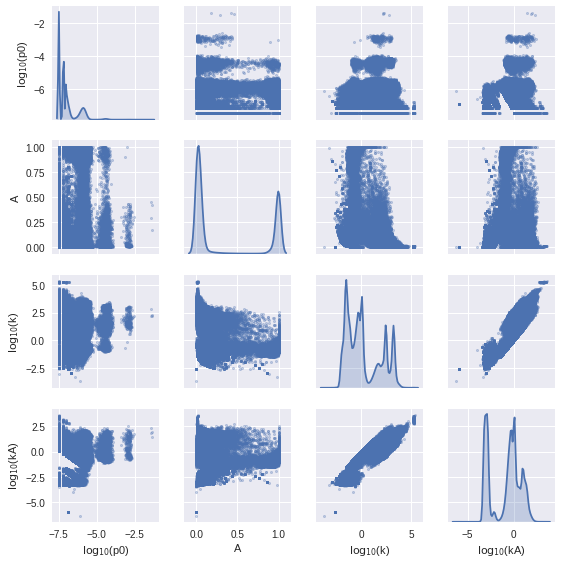

In [17]:
from k_seq.utility import plot_tools
reload(plot_tools)
plot_tools.pairplot(data=byo_doped, vars_name=['p0', 'A', 'k', 'kA'],
             vars_log=[True, False, True, True], diag_kind='kde')

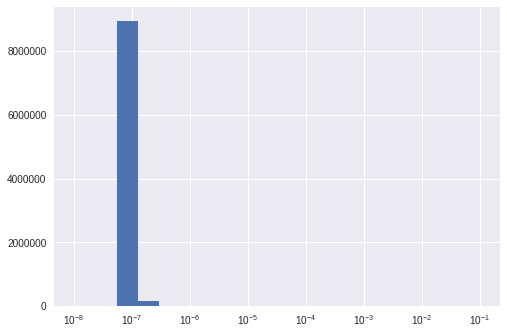

In [24]:
bins = np.logspace(-8, -1, 20)
plt.hist(input_pool / input_pool.sparse.to_dense().sum(), bins=bins)
plt.xscale('log')
# plt.yscale('log')
plt.show()

In [122]:
fit_res = pd.read_csv('/mnt/storage/projects/k-seq/working/byo_doped/least_square/point-est_bounded_pod_10-21-19/fit_summary.csv')

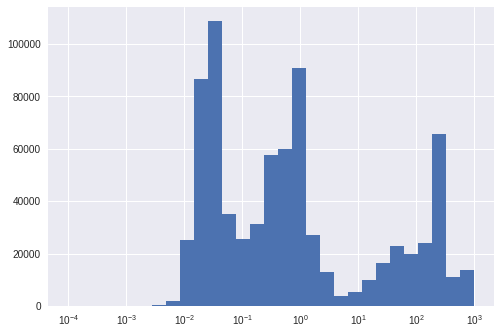

In [131]:
bins = np.logspace(-4, 3, 30)
plt.hist(fit_res['k'], bins=bins)
plt.xscale('log')

In [13]:
from k_seq.data import seq_table
reload(seq_table)

byo_doped = seq_table.SeqTable.load_dataset(dataset='byo-doped')

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped.pkl
Imported!


# Count data simulation
This notebook simulate k-seq count dataset from 1) independent parametric distributions; 2) fitted results, for method evaluation

# Simulate from individual distribution

In [31]:
np.ones_like([0, 2, 1, 2])

array([1, 1, 1, 1])

## Small, even pool, low depth


No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


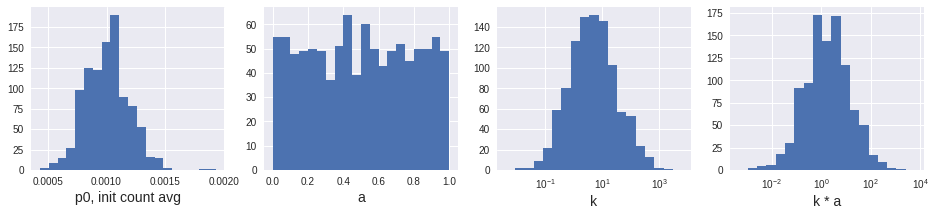

In [62]:
reload(simu)
x, Y, dna_amount, truth, seq_table = simu.simulate_from_distribution(
    seq_num=1_000,
    depth=10,
    p0_loc=0,
    p0_scale=0,
    k_95=[0.1, 200],
    dna_amount_error=dna_amount_error,
    # save_to='/mnt/storage/projects/k-seq/datasets/simulated/dist_small_even_shallow'
)

In [67]:
seq_table.table_seq_in_all_smpl_reacted_frac

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15
seq,,,,,,,,,,,,,,,
0,0.001069,0.000585,0.001617,0.007167,0.003375,0.003381,0.020713,0.034033,0.042968,0.139049,0.117742,0.094772,0.191382,0.203680,0.085917
2,0.002726,0.002992,0.002524,0.010702,0.009429,0.008949,0.056859,0.074072,0.059863,0.219551,0.207779,0.244435,0.414491,0.284553,0.560986
4,0.002193,0.001214,0.003300,0.009542,0.010384,0.013002,0.047799,0.057594,0.049579,0.287106,0.212275,0.227116,0.401502,0.254600,0.555155
8,0.000460,0.000113,0.000361,0.001067,0.002177,0.002726,0.004454,0.004391,0.013131,0.084988,0.028486,0.056440,0.151535,0.180684,0.249436
14,0.002139,0.001988,0.000870,0.007719,0.007312,0.007325,0.036823,0.036302,0.054276,0.117094,0.206048,0.160383,0.574147,0.594067,0.670151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0.001386,0.001364,0.001658,0.006892,0.008437,0.007043,0.023014,0.028361,0.028269,0.079282,0.079721,0.115427,0.101491,0.113156,0.171834
985,0.000356,0.000117,0.000249,0.001654,0.001125,0.001690,0.002301,0.022689,0.015830,0.058547,0.036794,0.021870,0.139187,0.237627,0.206200
990,0.001528,0.002881,0.001332,0.010633,0.008437,0.007244,0.061645,0.046188,0.036345,0.250916,0.181343,0.257759,0.876134,0.727429,0.754841


In [34]:
len(np.shape([0, 2, 1]))

1

## Small, even pool, high depth

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


/home/yuning/research/k-seq/src/pkg/k_seq/data/simu.py:271: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  save_path.mkdir(parents=True, exist_ok=True)


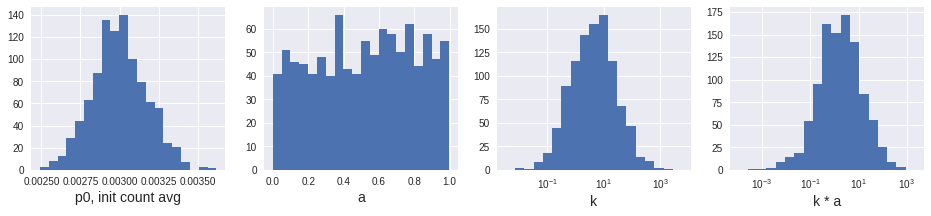

In [19]:
x, Y, dna_amount, truth = simulate_from_distribution(seq_num=1_000,
                                         depth=100,
                                         p0_loc=0,
                                         p0_scale=0,
                                         k_95=[0.1, 200],
                                         dna_amount_error=dna_amount_error,
                                         save_to='/mnt/storage/projects/k-seq/datasets/simulated/dist_small_even_deep')

## Small, uneven pool, low depth

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


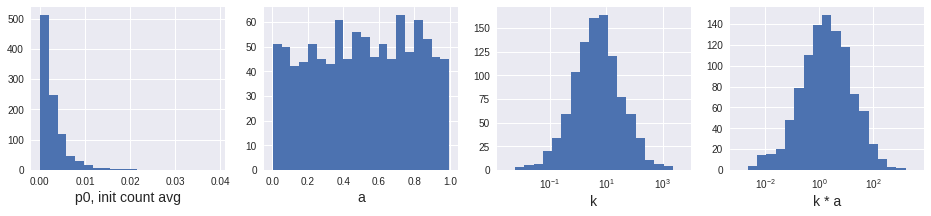

In [22]:
x, Y, dna_amount, truth = simulate_from_distribution(
    seq_num=1_000,
    depth=10,
    p0_loc=0,
    p0_scale=1,
    k_95=[0.1, 200],
    dna_amount_error=dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/dist_small_uneven_shallow'
)

## Small, uneven pool, high depth

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


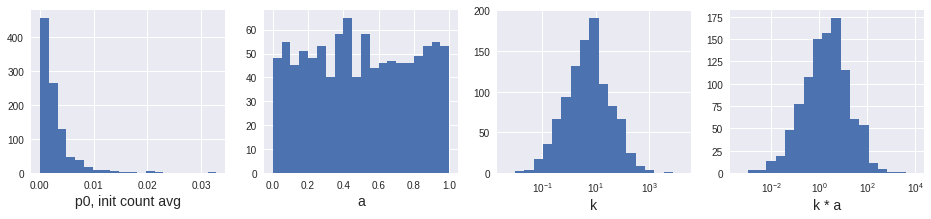

In [21]:
x, Y, dna_amount, truth = simulate_from_distribution(
    seq_num=1_000,
    depth=100,
    p0_loc=0,
    p0_scale=1,
    k_95=[0.1, 200],
    dna_amount_error=dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/dist_small_uneven_deep'
)

## Large, even pool, low depth

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


/home/yuning/research/k-seq/src/pkg/k_seq/data/simu.py:271: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  save_path.mkdir(parents=True, exist_ok=True)


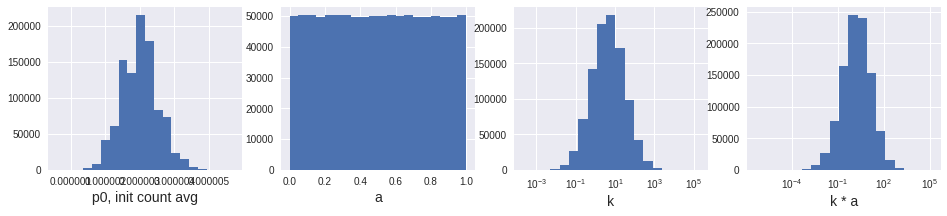

In [29]:
x, Y, dna_amount, truth = simulate_from_distribution(
    seq_num=1_000_000,
    depth=10,
    p0_loc=0,
    p0_scale=0,
    k_95=[0.1, 200],
    dna_amount_error=dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/dist_large_even_shallow'
)

## Large, even pool, high depth

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


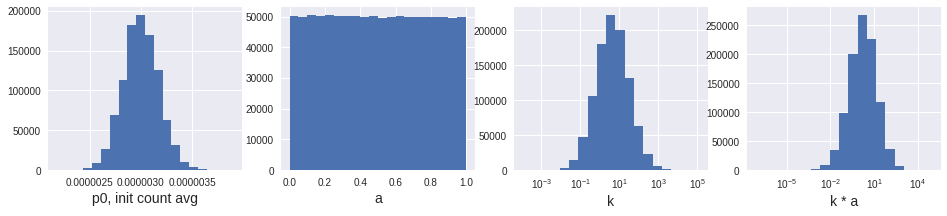

In [30]:
x, Y, dna_amount, truth = simulate_from_distribution(
    seq_num=1_000_000,
    depth=100,
    p0_loc=0,
    p0_scale=0,
    k_95=[0.1, 200],
    dna_amount_error=dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/dist_large_even_deep'
)

## Large, uneven, low depth

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


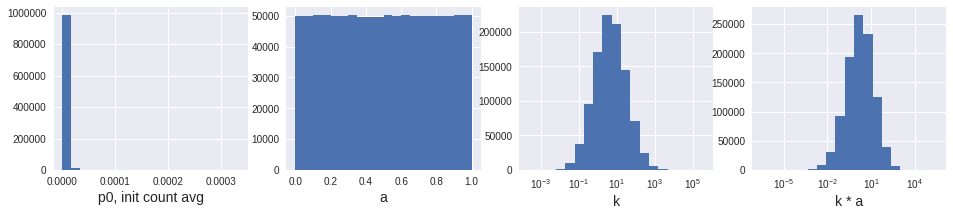

In [32]:
x, Y, dna_amount, truth = simulate_from_distribution(
    seq_num=1_000_000,
    depth=10,
    p0_loc=0,
    p0_scale=1,
    k_95=[0.1, 200],
    dna_amount_error=dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/dist_large_uneven_shallow'
)

## Large, uneven, high depth

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


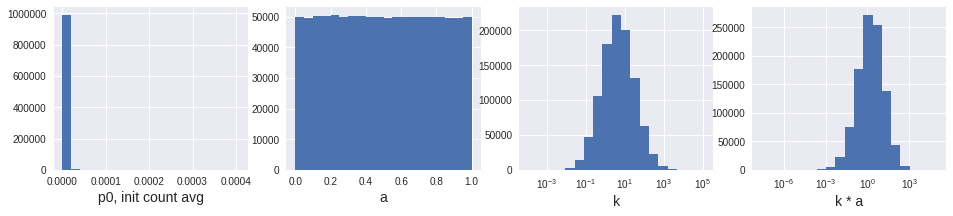

In [33]:
x, Y, dna_amount, truth = simulate_from_distribution(
    seq_num=1_000_000,
    depth=100,
    p0_loc=0,
    p0_scale=1,
    k_95=[0.1, 200],
    dna_amount_error=dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/dist_large_uneven_deep'
)

# Simulate from data

We simulate pool from estimated data to mimic the actual distribution

We use `least-squared` point-estimation for `doped-pool` as template for sampling 

- We filtered the sequence by the sequences we can perform classic least squared fitting (that only contains sequences observed in the input pool

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped.pkl
Imported!
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


/home/yuning/research/k-seq/src/k_seq/data/simu.py:287: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  dna_amount.to_csv(f'{save_path}/dna_amount.csv')
/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

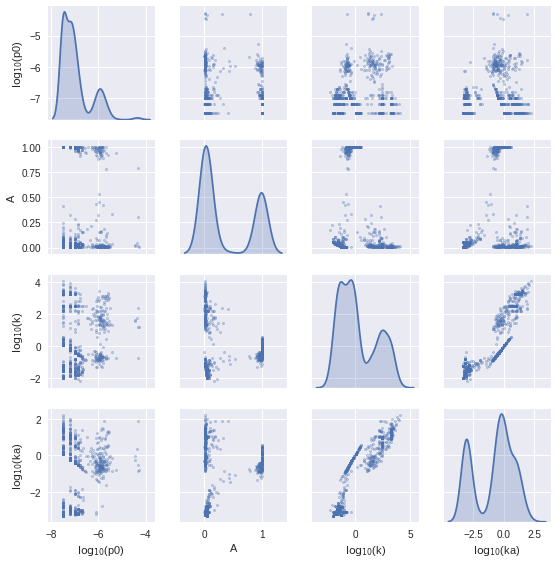

In [2]:
reload(simu)
reload(kinetic)
reload(pool)

_ = simu.simulate_from_sample(
    sample_table=simu.get_sample_table(
        seq_table='byo-doped',
        estimation='/mnt/storage/projects/k-seq/working/byo_doped/least_square/pandaSeq/point-est_2019-12/table-spike-in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-7/fit_summary.csv'
    ),
    seq_num=1e3,
    dna_amount_error=simu.dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000_d40'
    
)

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped.pkl
Imported!
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


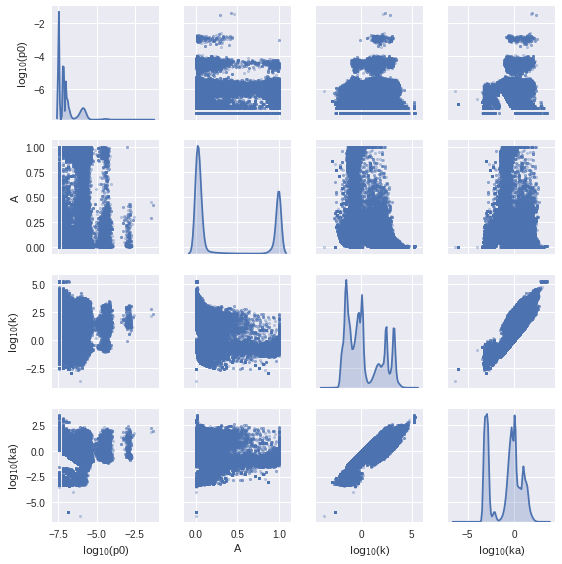

In [3]:
reload(simu)
reload(kinetic)
reload(pool)

_ = simu.simulate_from_sample(
    sample_table=simu.get_sample_table(
        seq_table='byo-doped',
        estimation='/mnt/storage/projects/k-seq/working/byo_doped/least_square/pandaSeq/point-est_2019-12/table-spike-in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-7/fit_summary.csv'
    ),
    seq_num=1e6,
    dna_amount_error=simu.dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000000_d40'
    
)

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped-pandaSeq.pkl
Imported!
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


/home/yuning/research/k-seq/src/k_seq/data/simu.py:287: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  dna_amount.to_csv(f'{save_path}/dna_amount.csv')
/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

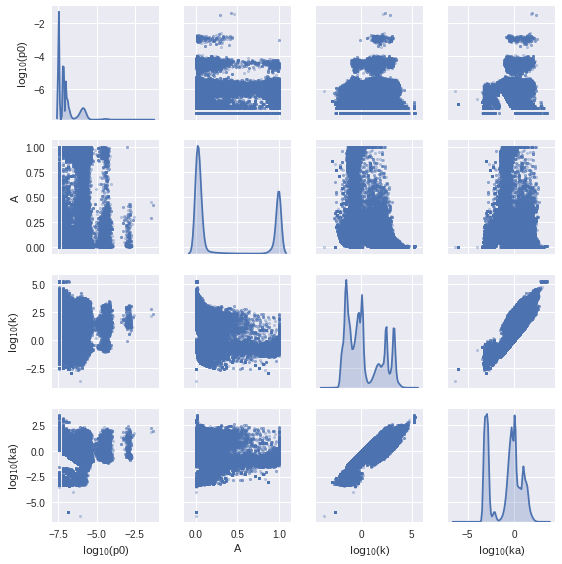

In [4]:
reload(simu)
reload(kinetic)
reload(pool)
from k_seq.utility import plot_tools
reload(plot_tools)

_ = simu.simulate_from_sample(
    sample_table=simu.get_sample_table(
        seq_table='byo-doped',
        estimation='/mnt/storage/projects/k-seq/working/byo_doped/least_square/pandaSeq/point-est_2019-12/table-spike-in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-7/fit_summary.csv'
    ),
    seq_num=1e6,
    depth=400,
    dna_amount_error=simu.dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000000_d400'   
)

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped.pkl
Imported!
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


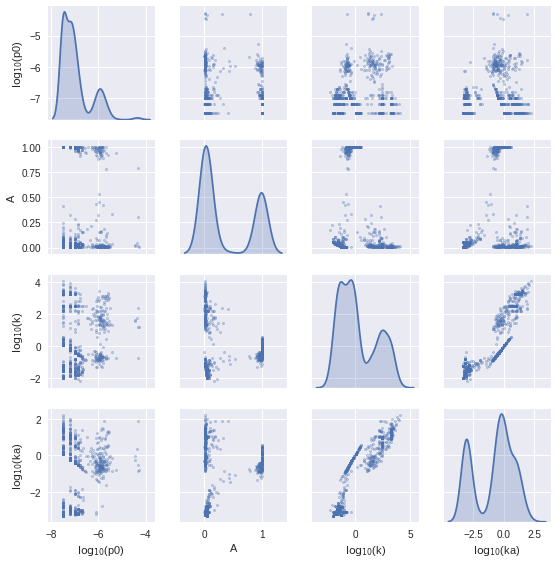

In [4]:
reload(simu)
reload(kinetic)
reload(pool)

_ = simu.simulate_from_sample(
    sample_table=simu.get_sample_table(
        seq_table='byo-doped',
        estimation='/mnt/storage/projects/k-seq/working/byo_doped/least_square/pandaSeq/point-est_2019-12/table-spike-in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-7/fit_summary.csv'
    ),
    seq_num=1e3,
    depth=10,
    dna_amount_error=simu.dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000_d10'
    
)

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped.pkl
Imported!
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


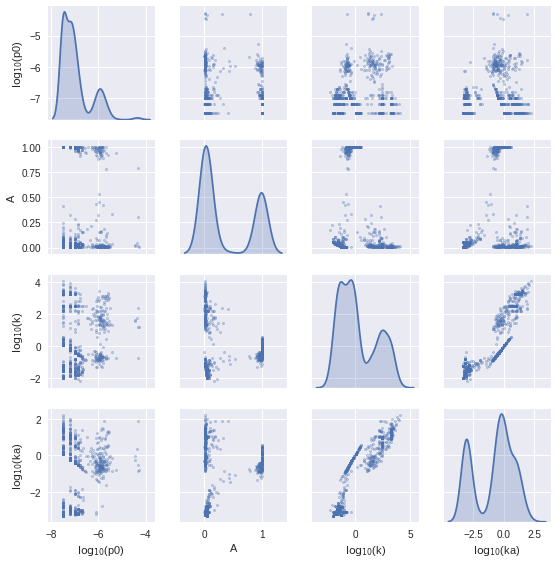

In [5]:
reload(simu)
reload(kinetic)
reload(pool)

_ = simu.simulate_from_sample(
    sample_table=simu.get_sample_table(
        seq_table='byo-doped',
        estimation='/mnt/storage/projects/k-seq/working/byo_doped/least_square/pandaSeq/point-est_2019-12/table-spike-in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-7/fit_summary.csv'
    ),
    seq_num=1e3,
    depth=100,
    dna_amount_error=simu.dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000_d100'
    
)

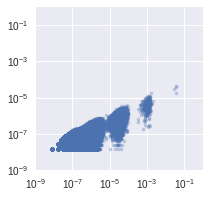

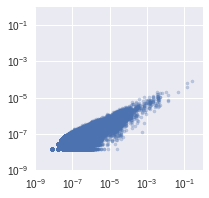

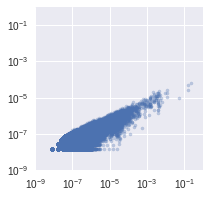

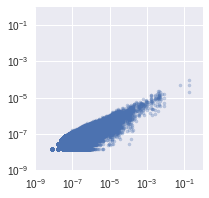

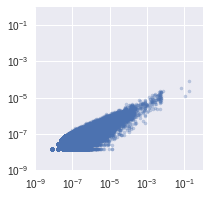

In [59]:
for sample in range(5):
    sample_list = [f"s{sample}-{rep}" for rep in range(3)]
    rel_abun = Y[sample_list] / Y[sample_list].sum(axis=0)
    plt.figure(figsize=[3, 3])
    plt.scatter(rel_abun.mean(axis=1), rel_abun.std(axis=1), s=10, alpha=0.3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([1e-9, 1])
    plt.ylim([1e-9, 1])

### Snippet for create gif

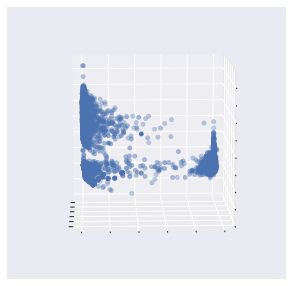

In [71]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log10(truth.p0), truth.A, np.log10(truth.k))
ax.set_xticklabels([])
#ax.set_xticks([])
ax.set_yticklabels([])
#ax.set_yticks([])
ax.set_zticklabels([])
#ax.set_zticks([])

for angle in range(0, 180):
    ax.view_init(10, angle * 2)
    plt.savefig(f'/mnt/storage/projects/k-seq/working/byo_doped/dataset_vis/seq_dist/gif/r_{angle * 2}.png', bbox_inches='tight')

In [72]:
from IPython import display
from PIL import Image
import glob

def get_img_num(img):
    file_name = img.filename[img.filename.rfind('/') + 1:-4]
    return int(file_name.split('_')[-1])

img, *imgs = sorted([Image.open(image) for image in glob.glob('/mnt/storage/projects/k-seq/working/byo_doped/dataset_vis/seq_dist/gif/*.png')], key=get_img_num)
img.save(fp='/mnt/storage/projects/k-seq/working/byo_doped/dataset_vis/seq_dist/gif/movie.gif',
         format='GIF', append_images=imgs,
         save_all=True, duration=150, loop=0)

## [Analysis] Caveats of sampling from a heterogenous pool

If not weighting each unique sequences, it will be more likely to sample the low pct seqs.

QUESTION: what does the heterogeneity means here? Entropy?

In [212]:
simu_pool_sizes = [-1, 1e1, 1e3, 1e5, 1e6, 1e7, 1e8]
from k_seq.data.simu import PoolParamSimulator

sampled_pool = [ls_point_est if size < 0 else PoolParamSimulator.sample_from_dataframe(df=ls_point_est, size=int(size),
                                                                                       seed=23)
                for size in simu_pool_sizes]

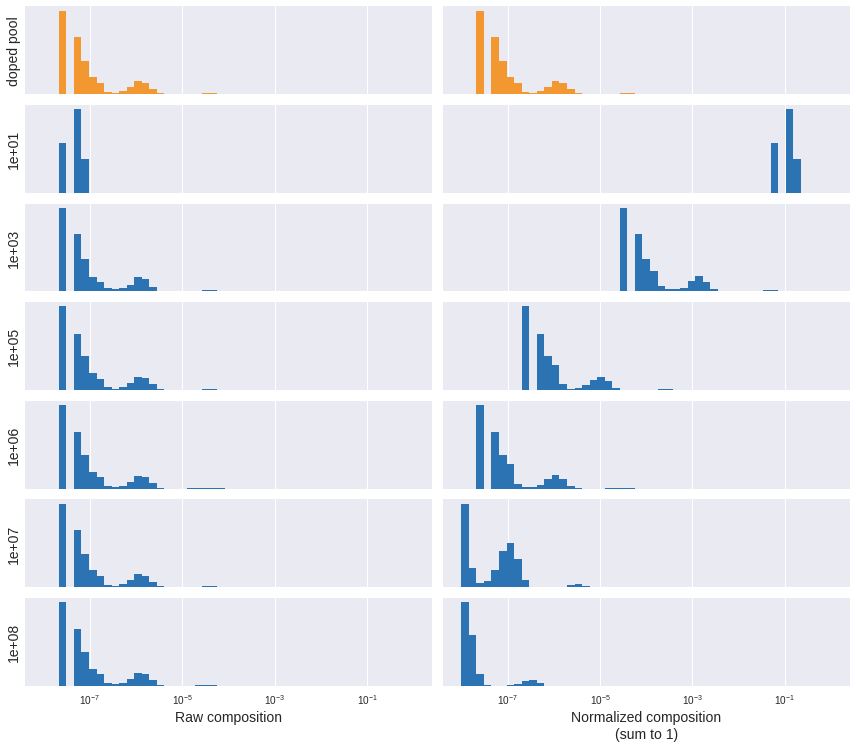

In [213]:
fig, axes = plt.subplots(len(simu_pool_sizes), 2,
                         figsize=[6 * 2, 1.5 * len(simu_pool_sizes)],
                         sharex=True)
fig.subplots_adjust(hspace=0.01, wspace=0.01)

bins = np.logspace(-8, 0, 50)
for ax, sample, size in zip(axes, sampled_pool, simu_pool_sizes):
    ax[0].hist(sample['p0'], bins=bins, color='#F39730' if size < 0 else '#2C73B4')
    ax[0].set_xscale('log')
    ax[0].set_yticks([])
    ax[0].set_ylabel('doped pool' if size <0 else f'{size:1.0e}', fontsize=14)
    ax[1].hist(sample['p0']/sample['p0'].sum(), bins=bins, color='#F39730' if size < 0 else '#2C73B4')
    ax[1].set_xscale('log')
    ax[1].set_yticks([])
axes[-1][0].set_xlabel('Raw composition', fontsize=14)
axes[-1][1].set_xlabel('Normalized composition\n(sum to 1)', fontsize=14)

plt.tight_layout()
plt.show()

In [214]:
def get_entropy(series, normalize=True, base=2):
    if pd.api.types.is_sparse(series):
        series = series.sparse.to_dense()
    series = series / np.sum(series)
    if normalize:
        return -np.sum(series * np.log(series)) / np.log(len(series))
    else:
        return -np.sum(series * np.log(series)) / np.log(base)

In [215]:
entropy_efficiency = [get_entropy(pool['p0'], normalize=True) for pool in sampled_pool]

In [216]:
entropy_efficiency

[0.6483428703023708,
 0.9696468912182086,
 0.6109410935818711,
 0.5089605113954405,
 0.6576124812379042,
 0.7006322329074502,
 0.7385569991223883]

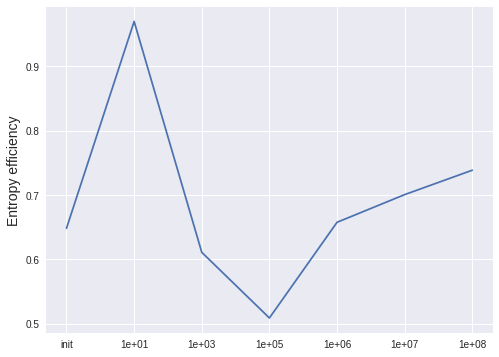

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.arange(len(simu_pool_sizes)), entropy_efficiency)
ax.set_xticks(np.arange(len(simu_pool_sizes)))
ax.set_xticklabels(['init' if size < 0 else f'{size:1.0e}' for size in simu_pool_sizes])
ax.set_ylabel('Entropy efficiency', fontsize=14)
plt.show()